## Advection mode and methods

    Tutorial to define advection options
    Mode: backward or forward
    Methods: Runga-kutta 1 (RK4 flat)
             Runga-kutta 4  (RK1 flat)
    
    Mode is either controlled by time variable (increasing=forward,
    decreasing=backward) or by argument mode = "backward" or "forward"
    when initializing particles (ParticleSet)
    
    Methods are defined as functions in Diagnostics.py. New methods
    can be implemented directly in Diagnostics.py.
    
    Two examples are provided using different fields and particles
    setting.

    
### Import librairies

In [1]:
import lamta
#print(lamta.__file__)

from lamta.Diagnostics import ParticleSet, Lagrangian
from testFields import peninsula
from lamta.Load_nc import loadCMEMSuv
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

Peninsula case with parcels initialized from inputs

In [2]:
field = peninsula()
# if particles are set "from_input" forward and backward advections can be
# set using increasing or decreasing time values (pt) 
ptf = np.array([0,200]) #forward
ptb = np.array([200,0]) #backward
px = np.array([200,200,200,200])    
py = np.array([15,35,55,75])
numstep = 30
psetf = ParticleSet.from_input(ptf,px,py,fieldset=field, xy="xy") #forward
psetb = ParticleSet.from_input(ptb,px,py,fieldset=field, xy="xy") #backward

lon = np.array(psetf.lon)
lat = np.array(psetf.lat)

# Trajectories with RK1 method
trjff = psetf.rk1flat(Lagrangian.interpf,numstep)
trjfb = psetb.rk1flat(Lagrangian.interpf,numstep)

c:\Users\lloyd\Desktop\lagrangian_dev\LAMTA_examples\notebooks\testFields.py:22: RuntimeWarning: invalid value encountered in scalar divide
  psi[i,j] = (u0*R**2*y[j]/((x[i]-x0)**2 + y[j]**2)) - u0*y[j]
C:\Users\lloyd\Desktop\lagrangian_dev\LAMTA\lamta\Diagnostics.py:1182: UserWarning: Warning: x and y data are not lon/lat
  warnings.warn("Warning: x and y data are not lon/lat")


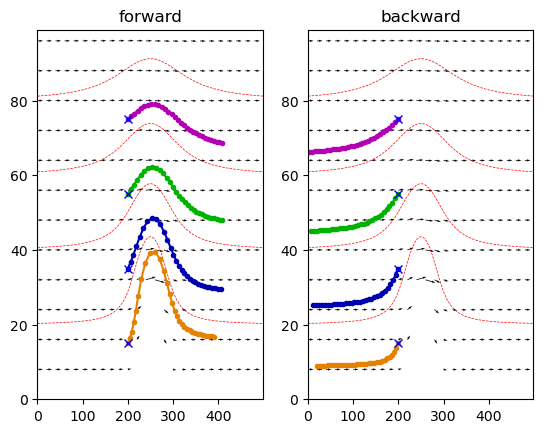

In [3]:
# Plot trajectories
xf,yf = np.asarray(trjff['trjx']),np.asarray(trjff['trjy'])
xb,yb = np.asarray(trjfb['trjx']),np.asarray(trjfb['trjy'])
col = [[0.9,0.5,0],[0,0,0.7],[0,0.7,0],[0.7,0,0.7]]

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.contour(field['lon'],field['lat'],field['psi'],levels=np.arange(-80,0,20),colors='red',linewidths=0.5)
ax1.quiver(field['lon'][0:500:20,0:100:8],field['lat'][0:500:20,0:100:8],field['u'][0:500:20,0:100:8],
           field['v'][0:500:20,0:100:8],scale=40)
for i in range(4):
    ax1.plot(xf[:,i],yf[:,i],color=col[i])
    ax1.plot(xf[:,i],yf[:,i],'.',color=col[i])
ax1.plot(trjff['trjx'][0],trjff['trjy'][0],'bx') #initial positions
ax1.set_title('forward')
ax2.contour(field['lon'],field['lat'],field['psi'],levels=np.arange(-80,0,20),colors='red',linewidths=0.5)
ax2.quiver(field['lon'][0:500:20,0:100:8],field['lat'][0:500:20,0:100:8],field['u'][0:500:20,0:100:8],
           field['v'][0:500:20,0:100:8],scale=40)
for i in range(4):
    ax2.plot(xb[:,i],yb[:,i],color=col[i])
    ax2.plot(xb[:,i],yb[:,i],'.',color=col[i])
ax2.plot(trjfb['trjx'][0],trjfb['trjy'][0],'bx') #initial positions
ax2.set_title('backward')
plt.show()

### Ocean case with parcels initialized from grid

In [4]:
from pathlib import Path
from lamta_examples.data_fetch import ensure_dataset

from lamta.Load_nc import loadCMEMSuv
from lamta.Diagnostics import Lagrangian, ParticleSet

# 1) Ensure dataset is available (download + checksum + extract)
DATA_DIR = ensure_dataset("altimetry_nrt_global_20220909-20220929.tar.gz")
rep = str(DATA_DIR / "altimetry" / "nrt_global") + "/"

# 3) Load field
all_days = [
    "20220919","20220920","20220921","20220922","20220923",
    "20220924","20220925","20220926","20220927","20220928","20220929"
]
varn = {"longitude": "longitude", "latitude": "latitude", "u": "ugos", "v": "vgos"}

field = loadCMEMSuv(all_days, rep, varn, unit="deg/d")

# Particle set from grid
numdays = 10
loni = [5,7]
lati = [41,43]
delta0 = 0.5
dayvb = '2022-09-29' #starting backward advection from 2022-09-29
dayvf = '2022-09-19' #starting forward advection from 2022-09-19
numstep = 20
#if "mode" argument is not defined, default is backward
psetb = ParticleSet.from_grid(numdays,loni,lati,delta0,dayvb,fieldset=field,mode='backward')
psetf = ParticleSet.from_grid(numdays,loni,lati,delta0,dayvf,fieldset=field,mode='forward')

# Trajectories RK4 with u,v from ocean field
trjfb = psetb.rk4flat(Lagrangian.interpf,numstep,coordinates='spherical')
trjff = psetf.rk4flat(Lagrangian.interpf,numstep,coordinates='spherical')

c:\Users\lloyd\miniforge3\envs\lamta_examples\Lib\site-packages\shapely\creation.py:218: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, np.intc(handle_nan), out=out, **kwargs)
c:\Users\lloyd\miniforge3\envs\lamta_examples\Lib\site-packages\shapely\creation.py:218: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, np.intc(handle_nan), out=out, **kwargs)
c:\Users\lloyd\miniforge3\envs\lamta_examples\Lib\site-packages\shapely\creation.py:218: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, np.intc(handle_nan), out=out, **kwargs)
c:\Users\lloyd\miniforge3\envs\lamta_examples\Lib\site-packages\shapely\creation.py:218: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, np.intc(handle_nan), out=out, **kwargs)
c:\Users\lloyd\miniforge3\envs\lamta_examples\Lib\site-packages\shapely\creation.py:218: RuntimeWarning: invalid value encou

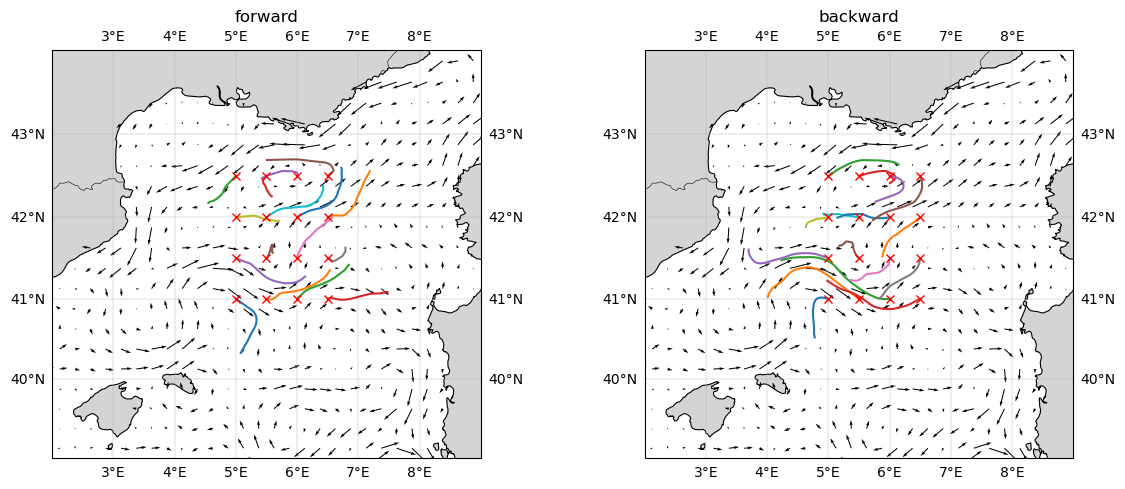

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Plot trajectories
# Prepare lon/lat grid
Yg, Xg = np.meshgrid(field['lat'], field['lon'])

u0 = field['u'][0, :, :]
v0 = field['v'][0, :, :]

fig = plt.figure(figsize=(12, 5))

proj = ccrs.Mercator()
data_crs = ccrs.PlateCarree()  # lon/lat data

# =====================
# Forward trajectories
# =====================
ax = fig.add_subplot(1, 2, 1, projection=proj)
ax.set_title("forward")

ax.set_extent([2, 9, 39, 44], crs=data_crs)

# background
ax.add_feature(cfeature.LAND, facecolor="0.83", zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.4)
ax.gridlines(draw_labels=True, linewidth=0.3)

# velocity field
ax.quiver(
    Xg, Yg, u0, v0,
    transform=data_crs,
    scale=5
)

# trajectories
ax.plot(
    trjff['trjx'], trjff['trjy'],
    transform=data_crs
)
ax.plot(
    trjff['trjx'][0], trjff['trjy'][0],
    "rx", transform=data_crs
)

# =====================
# Backward trajectories
# =====================
ax = fig.add_subplot(1, 2, 2, projection=proj)
ax.set_title("backward")

ax.set_extent([2, 9, 39, 44], crs=data_crs)

ax.add_feature(cfeature.LAND, facecolor="0.83", zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.4)
ax.gridlines(draw_labels=True, linewidth=0.3)

ax.quiver(
    Xg, Yg, u0, v0,
    transform=data_crs,
    scale=5
)

ax.plot(
    trjfb['trjx'], trjfb['trjy'],
    transform=data_crs
)
ax.plot(
    trjfb['trjx'][0], trjfb['trjy'][0],
    "rx", transform=data_crs
)

plt.tight_layout()
plt.show()
